In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\yoges\Downloads\IPL Dataset.csv")
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

1.General Analysis of IPL Matches

In [6]:
df.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()

venue
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                   

Insight: The analysis shows most of the IPL matches were played in Chennai, Mumbai, Kolkata, Banglore, and Delhi.

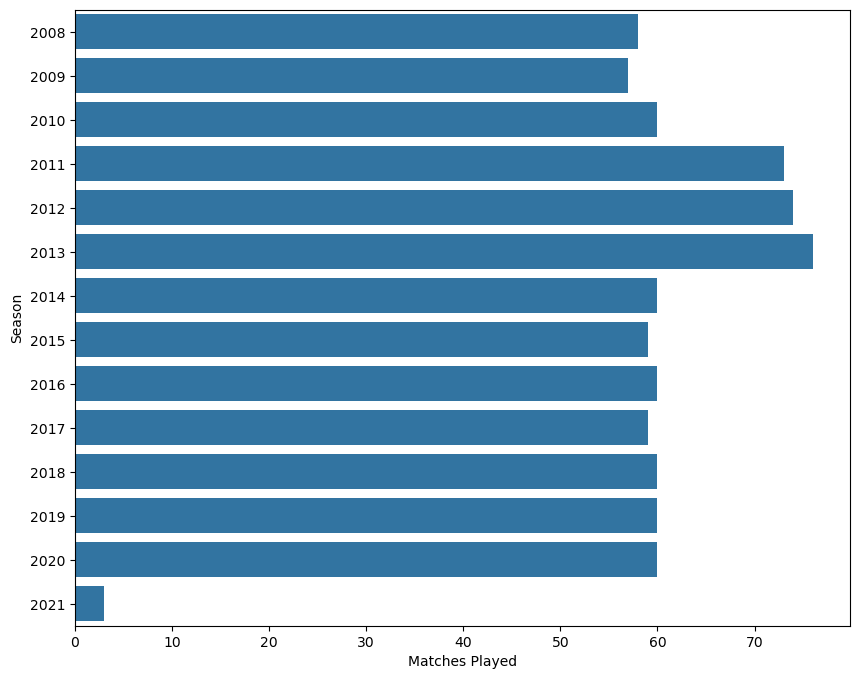

In [5]:
plt.figure(figsize=(10,8))
data = df.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

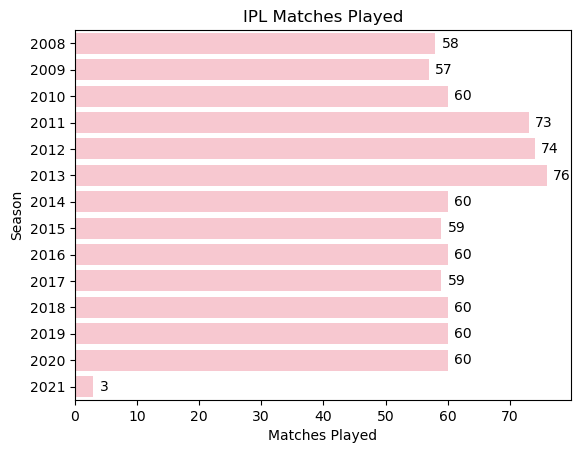

In [38]:
data = df.groupby(['match_id', 'season']).count().index.droplevel(level=0).value_counts().sort_index()
ax = sns.barplot(y=data.index, x=data.values, orient='h',color='pink')

for i, v in enumerate(data.values):
    ax.text(v + 1, i, str(v), color='black', va='center')  # +1 to nudge text slightly right

plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.title('IPL Matches Played')
plt.show()


Insight: Most IPl matches happened in 2013 with 76 matches played.

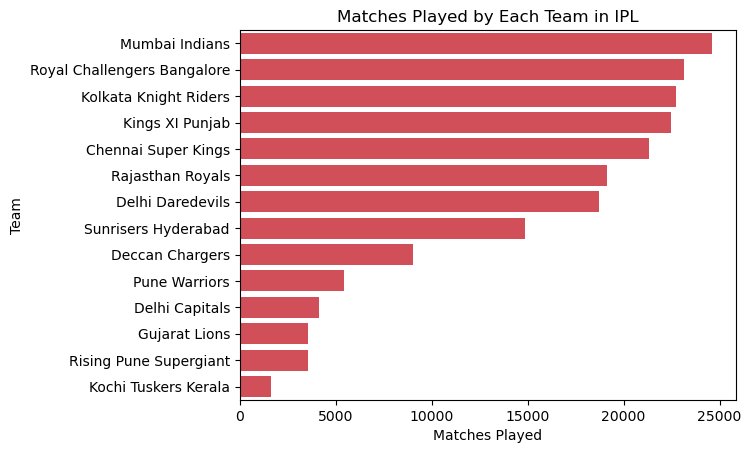

In [47]:
bar_color = "#E63946"
data = df['bowling_team'].value_counts().sort_values(ascending=False)
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)


plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.title('Matches Played by Each Team in IPL')
plt.show()


In [ ]:
Insight: Mumbai Indians playes most matches

2.IPL Batting Analysis

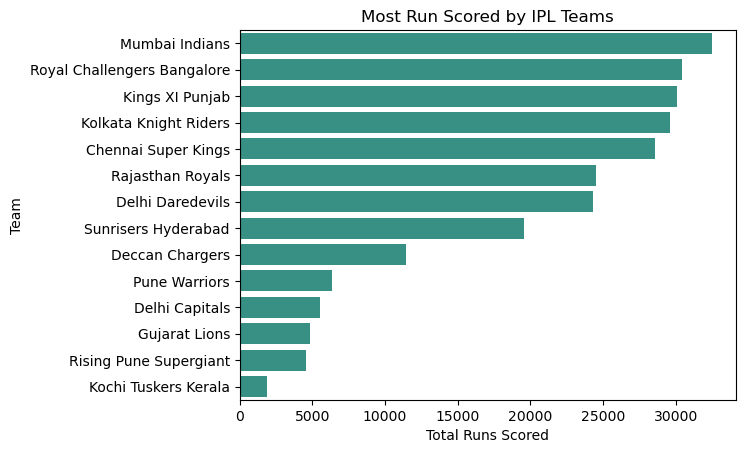

In [48]:
bar_color = "#2A9D8F"
data = df.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

plt.xlabel('Total Runs Scored')
plt.ylabel('Team')
plt.title('Most Run Scored by IPL Teams')
plt.show()


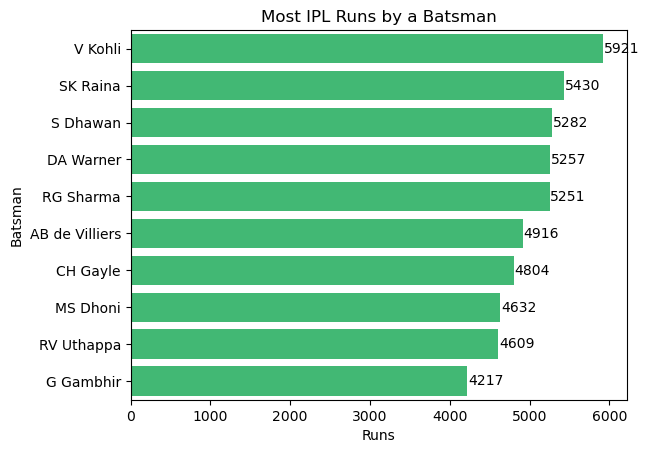

In [49]:
bar_color = "#2ECC71"
data = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

for i, v in enumerate(data.values):
    ax.text(v + 10, i, str(v), color='black', va='center')


plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.title('Most IPL Runs by a Batsman')
plt.show()


Insight: Virat Kohli is at the top of this list with more than 6,000 runs followed by Suresh Raina and Shikhar Dhawan.

In [16]:
df[df['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

Insight: Avg Run by a Teams in Powerplay.

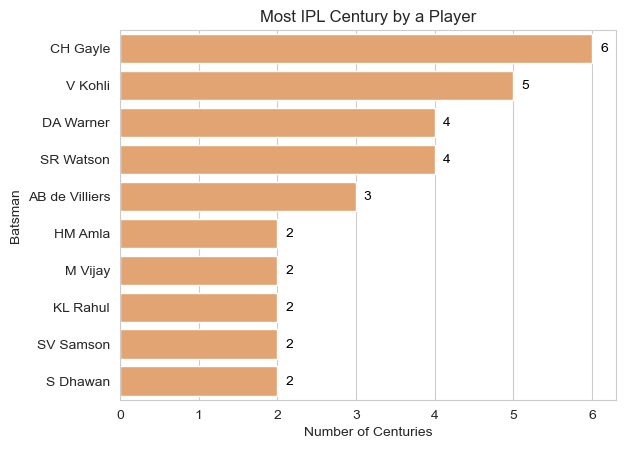

In [50]:
runs = df.groupby(['striker', 'match_id'])['runs_off_bat'].sum()
centuries = runs[runs >= 100].droplevel('match_id')
top_centuries = centuries.groupby('striker').count().sort_values(ascending=False)[:10]
sns.set_style("whitegrid")
sns.barplot(y=top_centuries.index, x=top_centuries.values, orient='h', color="#F4A261")

for i, v in enumerate(top_centuries.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.xlabel('Number of Centuries')
plt.ylabel('Batsman')
plt.title('Most IPL Century by a Player')
plt.show()


In [ ]:
Insight: Chris Gayle with 6 Centuries and follwed up wih Virat Kohli has most IPL Centuries.

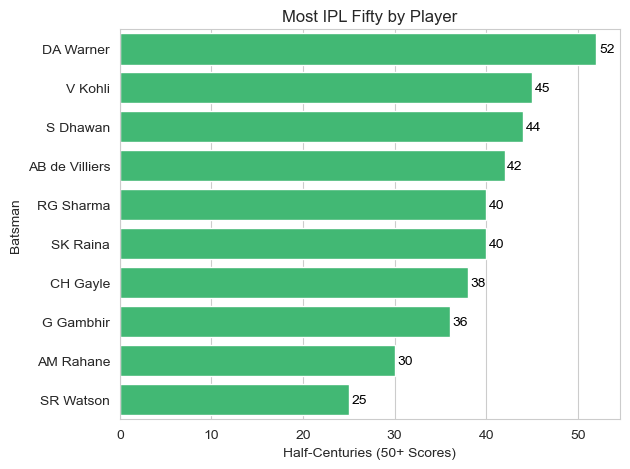

In [51]:
runs = df.groupby(['striker', 'start_date'])['runs_off_bat'].sum()
fifties = runs[runs >= 50].droplevel('start_date')
data = fifties.groupby('striker').count().sort_values(ascending=False).head(10)
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

for i, v in enumerate(data.values):
    ax.text(v + 0.3, i, str(v), color='black', va='center')


plt.xlabel('Half-Centuries (50+ Scores)')
plt.ylabel('Batsman')
plt.title('Most IPL Fifty by Player')
plt.tight_layout()
plt.show()


Insight:  Warner is top in the list followed by Virat Kohli and Shikhar Dhawan.

In [52]:
data = df.groupby(['season','striker'])['runs_off_bat'].sum().groupby('season').max()
temp_df=pd.DataFrame(df.groupby(['season','striker'])['runs_off_bat'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  S Dhawan 		 85


Insight: The batsman with the most runs in the tournament during the course of the season would wear the Orange Cap while fielding, with the overall leading run-scorer at the conclusion of the tournament winning the actual Orange Cap award on the day of the season’s final.

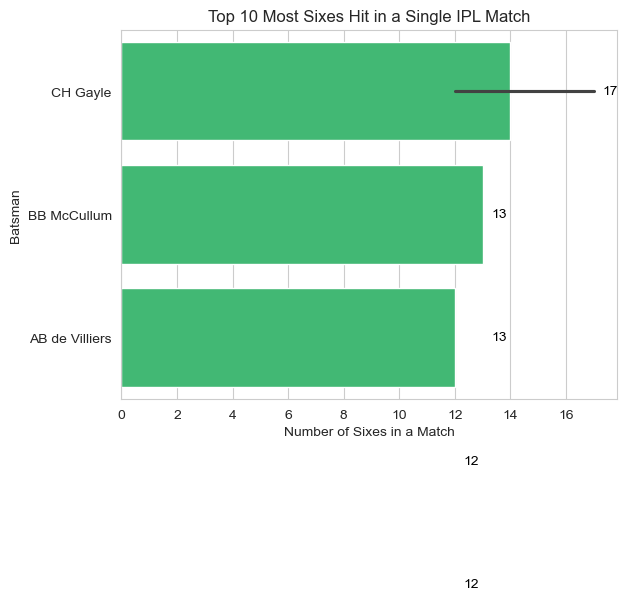

In [57]:
sixes = df[df['runs_off_bat'] == 6]
six_counts = sixes.groupby(['start_date', 'striker']).count()['season']
top_six_hitters = six_counts.sort_values(ascending=False).droplevel('start_date').head(5)
ax = sns.barplot(y=top_six_hitters.index, x=top_six_hitters.values, orient='h', color=bar_color)

for i, v in enumerate(top_six_hitters.values):
    ax.text(v + 0.3, i, str(v), color='black', va='center')

plt.xlabel('Number of Sixes in a Match')
plt.ylabel('Batsman')
plt.title('Top 10 Most Sixes Hit in a Single IPL Match')
plt.show()


Insight:Chris Gayle has hit the highest number of sixes in an inning with the number being 17 in the entire IPL history. Followed by Brendon McCullum and AB De Villiers.

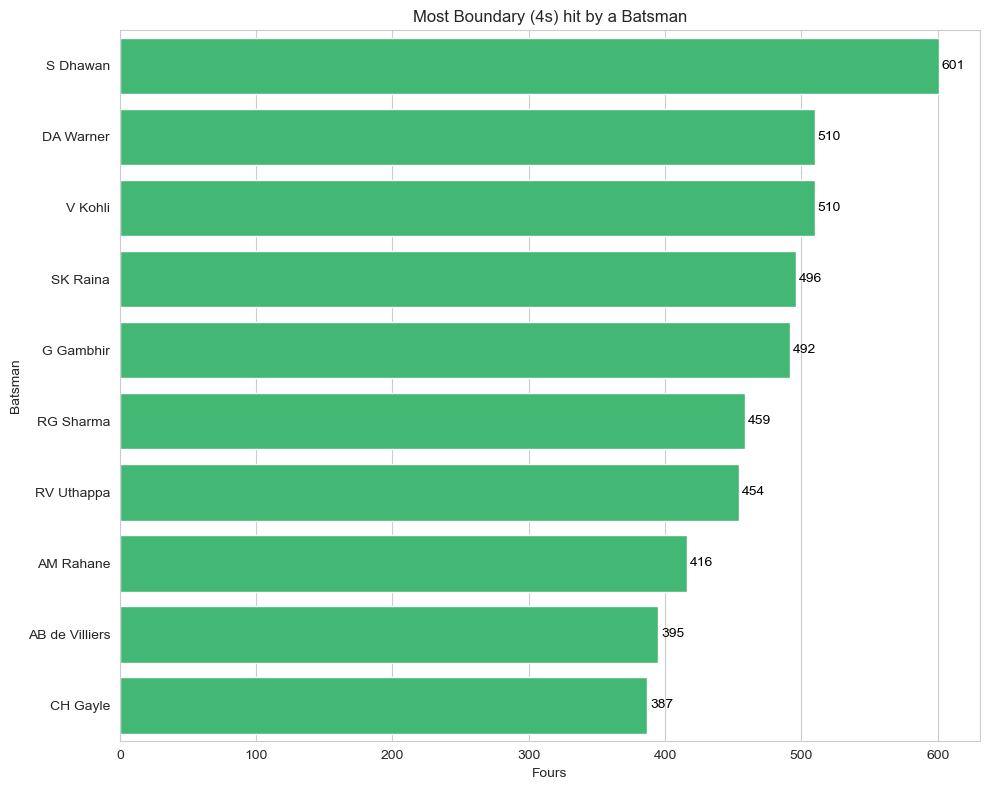

In [58]:
plt.figure(figsize=(10, 8))
data = df[df['runs_off_bat'] == 4]['striker'].value_counts().head(10)
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

for i, v in enumerate(data.values):
    ax.text(v + 2, i, str(v), color='black', va='center')

plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.title('Most Boundary (4s) hit by a Batsman')
plt.tight_layout()
plt.show()


Insight: Shikhar Dhawan is at the top of the list with more than 601 boundaries followed by Virat Kohli and David warner

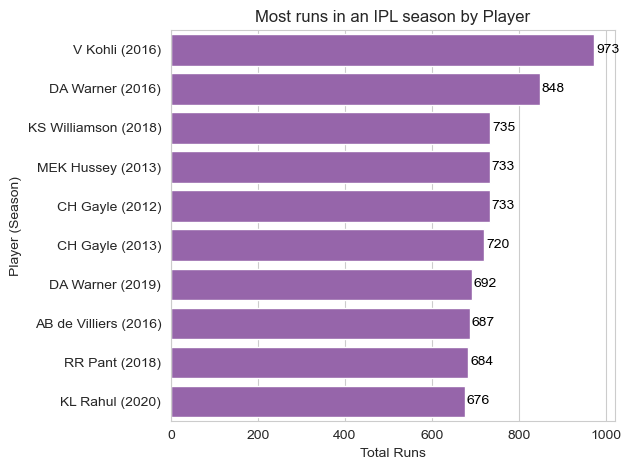

In [59]:
data = df.groupby(['striker', 'season'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
data.index = [f"{player} ({season})" for player, season in data.index]
bar_color = "#9B59B6"  
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

for i, v in enumerate(data.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.xlabel('Total Runs')
plt.ylabel('Player (Season)')
plt.title('Most runs in an IPL season by Player')
plt.tight_layout()
plt.show()


Insight: Virat Kohli is at the top of the list with 973 runs in 2016 season followed by David Warner and Kane Williamson with 848 and 735 runs in the 2016 and 2018

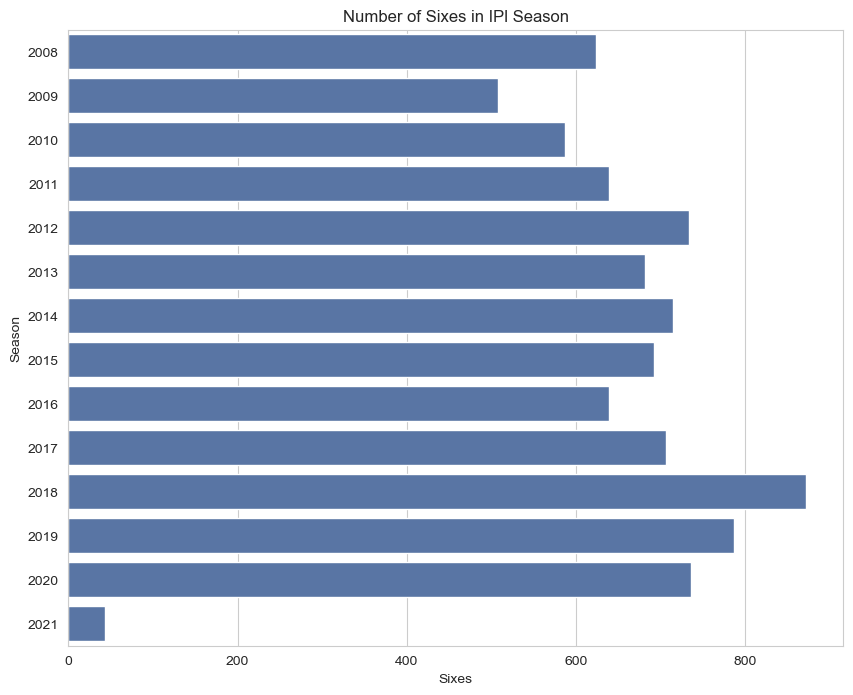

In [60]:
plt.figure(figsize=(10,8))
data = df[df['runs_off_bat'] == 6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.title('Number of Sixes in IPl Season')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()

Insights: 2018 is the season with the most number of sixes hit. Followed by season 2019 and 2020 in the list of most sixes in a season.

In [28]:
df.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Royal Challengers Bangalore    235
Kolkata Knight Riders          232
Kings XI Punjab                232
Delhi Daredevils               231
Sunrisers Hyderabad            231
Name: run, dtype: int64

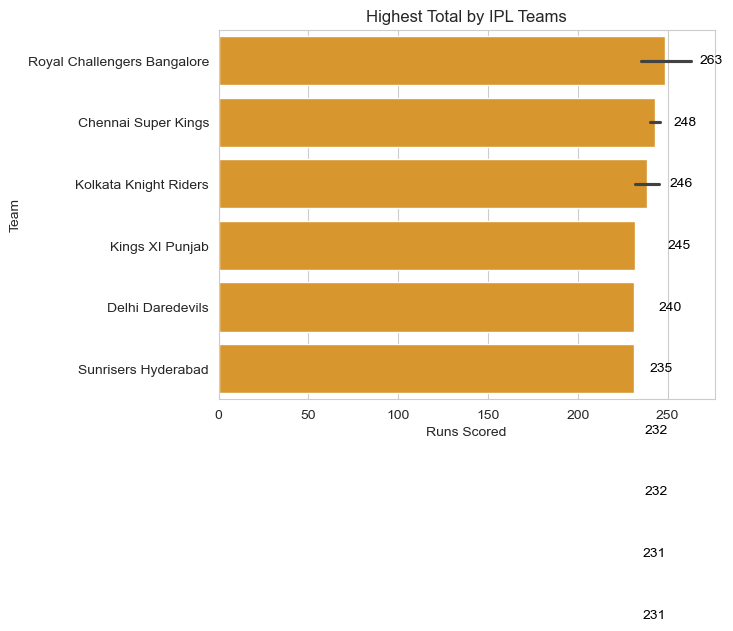

In [61]:
team_scores = df.groupby(['start_date', 'batting_team'])['run'].sum()
top_scores = team_scores.droplevel('start_date').sort_values(ascending=False).head(10)
bar_color = "#F39C12"
ax = sns.barplot(y=top_scores.index, x=top_scores.values, orient='h', color=bar_color)


for i, v in enumerate(top_scores.values):
    ax.text(v + 5, i, str(v), color='black', va='center')


plt.xlabel('Runs Scored')
plt.ylabel('Team')
plt.title('Highest Total by IPL Teams')

plt.show()


Insight: Royal Challengers Bangalore is at the top of the list of highest run by a team. The match was played against Pune Warrior in the 2019 season.

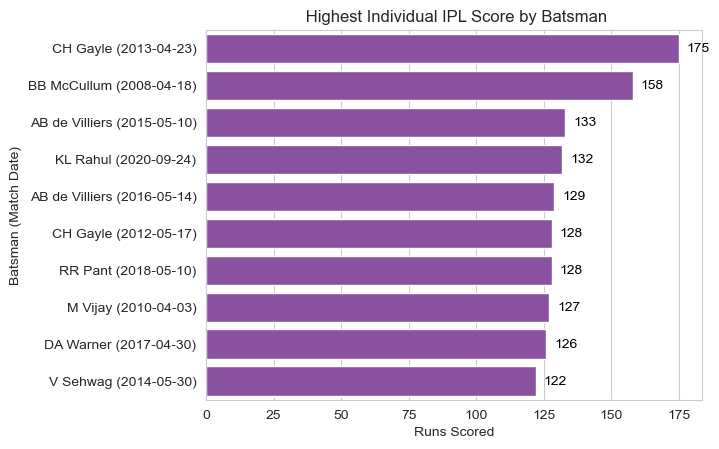

In [64]:
df['start_date'] = pd.to_datetime(df['start_date'])
data = df.groupby(['striker', 'start_date'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
data.index = [f"{player} ({date.date()})" for player, date in data.index]
sns.set_style("whitegrid")
bar_color = "#8E44AD"
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)


for i, v in enumerate(data.values):
    ax.text(v + 3, i, str(v), color='black', va='center')


plt.xlabel('Runs Scored')
plt.ylabel('Batsman (Match Date)')
plt.title(' Highest Individual IPL Score by Batsman')
plt.show()


Insight:Chris Gayle playing against Pune Warrior has hit the highest individual score in the 2013 season. Brendon McCullum and Ab de Villiers are in the second and third positions on the list.

3. Bowling Statistics

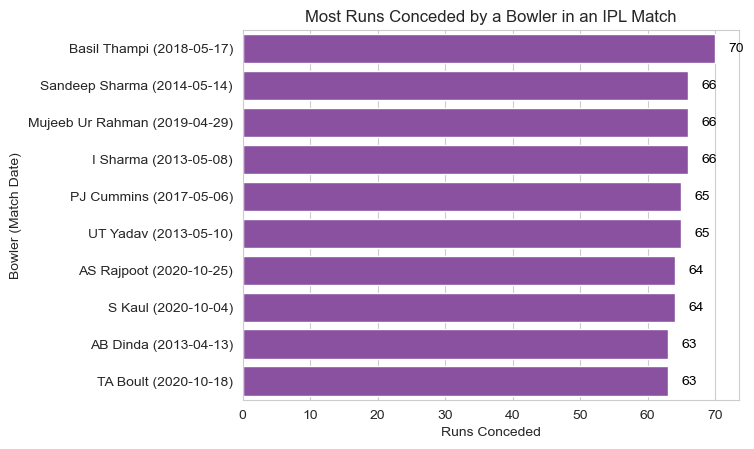

In [66]:
df['start_date'] = pd.to_datetime(df['start_date'])
data = df.groupby(['bowler', 'start_date'])['run'].sum().sort_values(ascending=False).head(10)
data.index = [f"{bowler} ({date.date()})" for bowler, date in data.index]
ax = sns.barplot(y=data.index, x=data.values, orient='h', color=bar_color)

for i, v in enumerate(data.values):
    ax.text(v + 2, i, str(v), color='black', va='center')

plt.xlabel('Runs Conceded')
plt.ylabel('Bowler (Match Date)')
plt.title('Most Runs Conceded by a Bowler in an IPL Match')
plt.show()


Insight: Basil Thampi playing for SRH against RCB in the 2008 season has conceded 70 runs

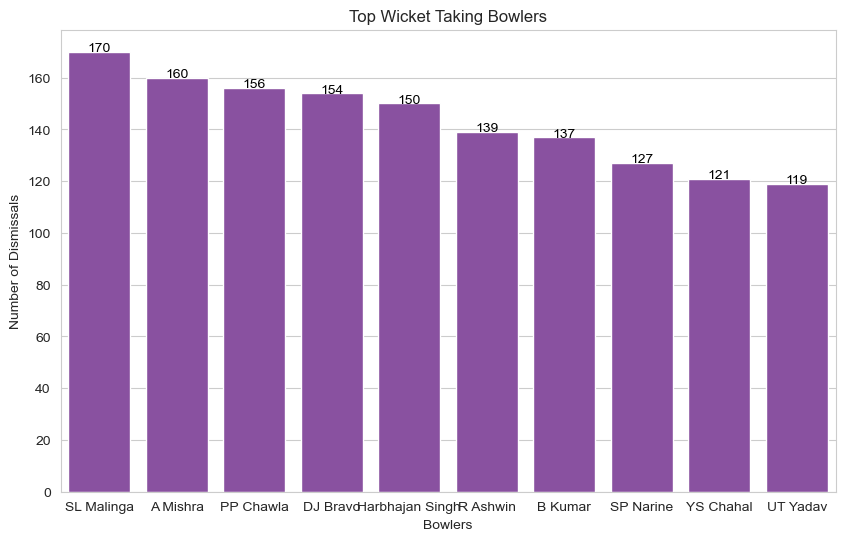

In [69]:
dismissal_types = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
filtered_df = df[df['wicket_type'].isin(dismissal_types)]
top_bowlers = filtered_df['bowler'].value_counts().head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_bowlers.index, y=top_bowlers.values, color=bar_color)


for i, v in enumerate(top_bowlers.values):
    ax.text(i, v + 0.1, str(v), color='black', ha='center')

plt.xlabel('Bowlers')
plt.ylabel('Number of Dismissals')
plt.title('Top Wicket Taking Bowlers')
plt.show()

Insight: Srilankan bowler Malinga is at the top of the list with 170 wickets followed by Amit Mishra and Push Chawla with 160 and 156 wickets respectively.

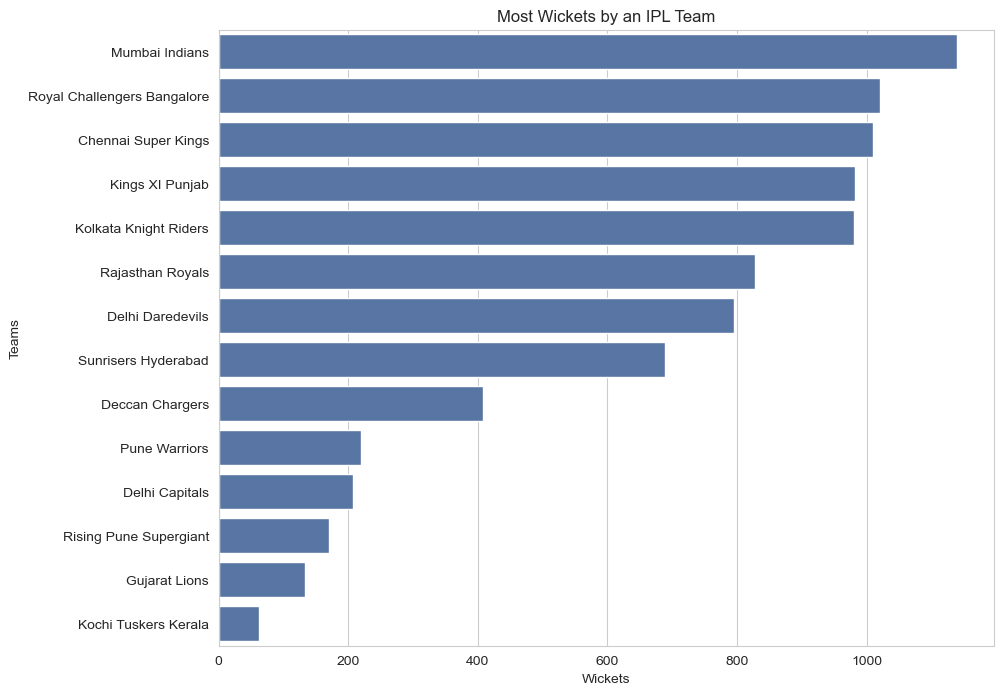

In [71]:
plt.figure(figsize=(10,8))
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data = df[df['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
df.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.title('Most Wickets by an IPL Team')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

In [ ]:
Insight: The Mumbai Indian has taken the most number of wickets in IPL followed by Royal Challengers Banglore and Chennai Super Kings